<a href="https://colab.research.google.com/github/amanmehra-23/TSA-Project/blob/main/MonteCarlo_Hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as ts
import statsmodels.graphics.tsaplots as sgt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
df_daily =pd.read_csv("/content/EURUSD1hour.csv")

In [4]:
df_daily.head()

,date,time,open,high,low,close,volume
0,2010.05.04,00:00,1.31884,1.31981,1.31853,1.31980,750
1,2010.05.04,01:00,1.31982,1.32004,1.31885,1.31942,626
2,2010.05.04,02:00,1.31947,1.32120,1.31915,1.32083,954
3,2010.05.04,03:00,1.32084,1.32131,1.31970,1.32073,896
4,2010.05.04,04:00,1.32076,1.32122,1.31928,1.32013,893


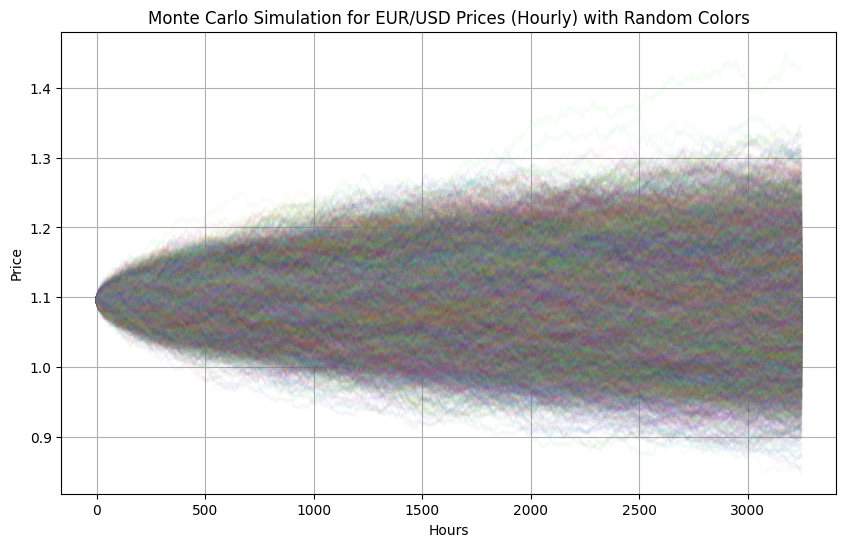

Mean Squared Error: 0.004197461910603329


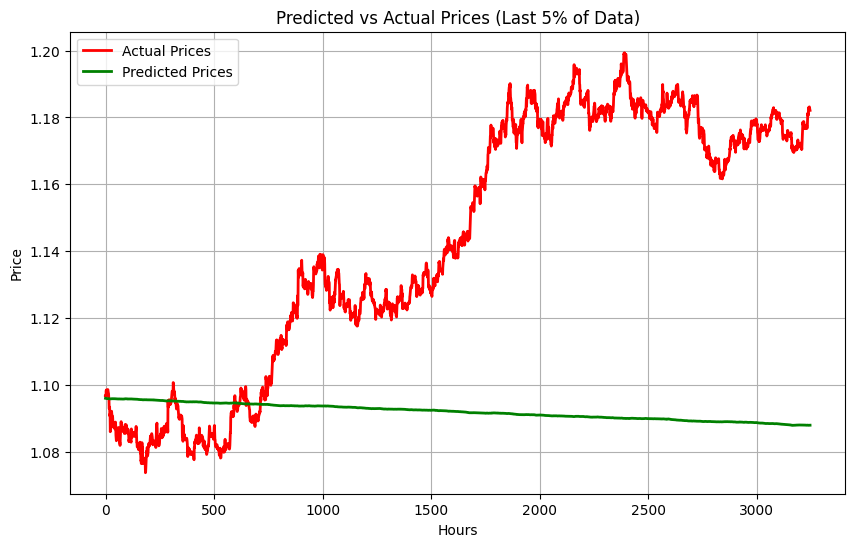

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is called `df_daily` and has columns 'Date' and 'Close'
# Example of what your df might look like:
# df_daily = pd.DataFrame({
#     'Date': pd.date_range(start='2023-01-01', periods=1000, freq='H'),
#     'Close': np.cumsum(np.random.normal(0, 0.01, 1000)) + 1.10
# })

# 1. Split the dataset into training (95%) and test (last 5%)
split_index = int(0.95 * len(df_daily))  # 95% for training

# Training data (first 95%)
training_data = df_daily.iloc[:split_index]
closing_prices_train = training_data['close'].values

# Test data (last 5%)
test_data = df_daily.iloc[split_index:]
real_future_prices = test_data['close'].values  # Use real future prices for evaluation

# Calculate hourly returns using the training data
hourly_returns = closing_prices_train[1:] / closing_prices_train[:-1] - 1

# Calculate drift and volatility
mean_return = np.mean(hourly_returns)
volatility = np.std(hourly_returns)

# 2. Monte Carlo simulation using Geometric Brownian Motion (GBM) to predict future prices
n_simulations = 10000  # Number of simulations
n_future_hours = len(real_future_prices)  # Predicting for the length of test data (last 5%)
last_price = closing_prices_train[-1]  # Last price from the training data

simulated_prices = np.zeros((n_simulations, n_future_hours))

for i in range(n_simulations):
    # Generate random shocks using the mean return (drift) and volatility
    random_shocks = np.random.normal(mean_return, volatility, n_future_hours)
    simulated_prices[i] = last_price * np.cumprod(1 + random_shocks)

# 3. Plot the simulation results using matplotlib with random colors
plt.figure(figsize=(10, 6))

# Plot each simulation (assign random colors and use low alpha for transparency)
for i in range(n_simulations):
    color = np.random.rand(3,)  # Generate a random color
    plt.plot(simulated_prices[i], color=color, alpha=0.05)

plt.title('Monte Carlo Simulation for EUR/USD Prices (Hourly) with Random Colors')
plt.xlabel('Hours')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# 4. Calculate mean predicted price
mean_simulated_prices = np.mean(simulated_prices, axis=0)

# 5. Calculate MSE using the real test data (last 5%)
mse = mean_squared_error(real_future_prices, mean_simulated_prices)
print(f"Mean Squared Error: {mse}")

# 6. Plot actual vs predicted prices using matplotlib
plt.figure(figsize=(10, 6))

# Plot actual prices (test data)
plt.plot(real_future_prices, label='Actual Prices', color='red', linewidth=2)

# Plot predicted mean prices
plt.plot(mean_simulated_prices, label='Predicted Prices', color='green', linewidth=2)

plt.title('Predicted vs Actual Prices (Last 5% of Data)')
plt.xlabel('Hours')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
